# 27 Keras Iris

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pylab as plt
import numpy as np

In [4]:
colors = 'bwr'#['b','y','r']
CMAP = colors#plt.cm.rainbow

In [5]:
import keras
print(keras.__version__)

Using TensorFlow backend.


2.2.2


In [6]:
import pandas as pd
print(pd.__version__)

0.23.4


## Building a simple neural network

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()

In [8]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

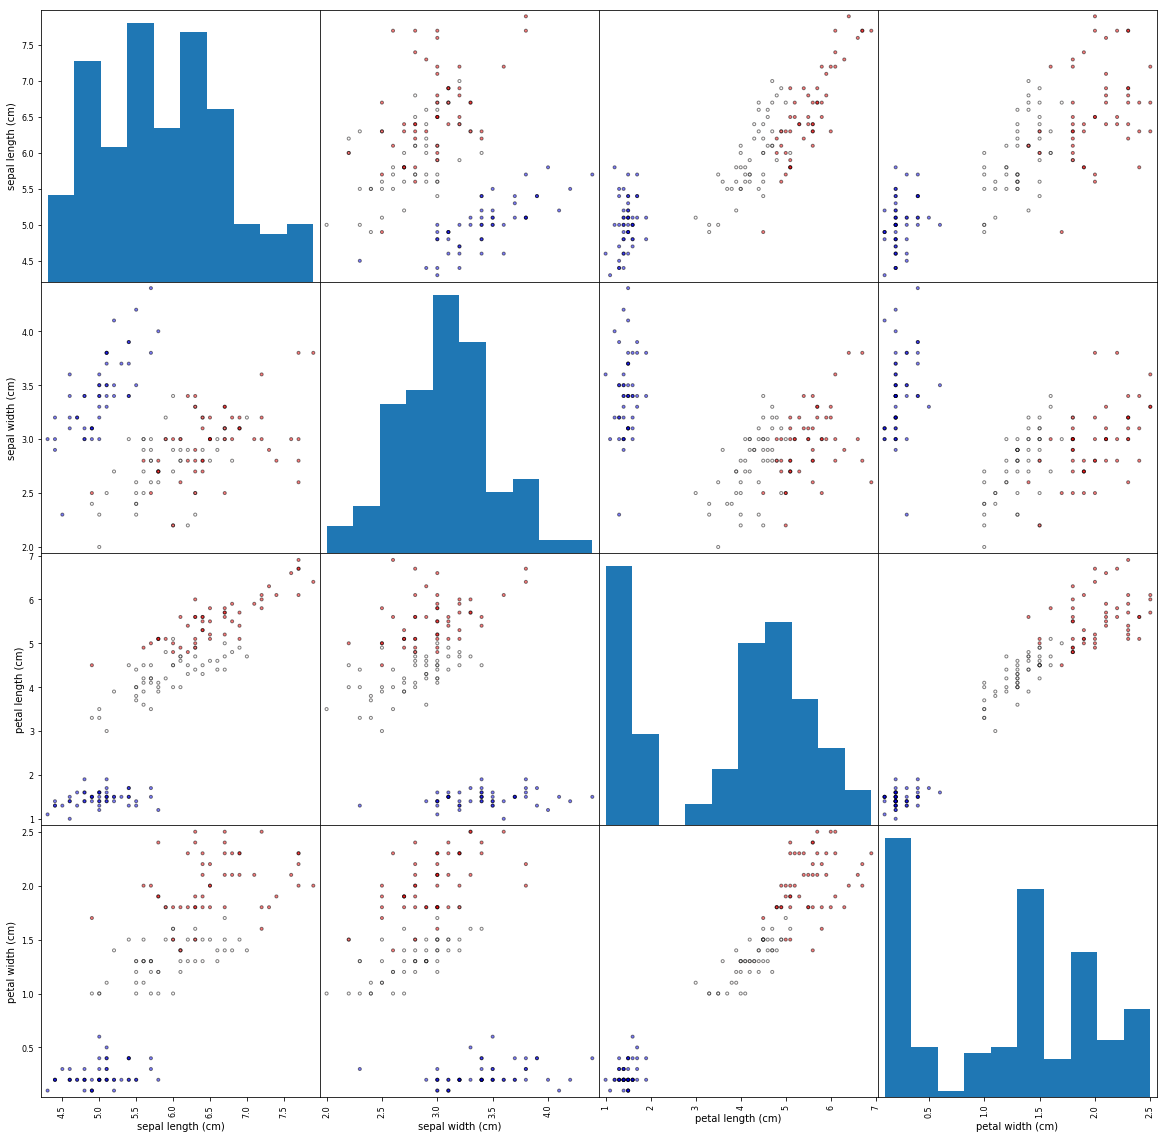

In [9]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=iris.target, cmap=CMAP, edgecolor='black', figsize=(20, 20));

## Unit with activation

In [10]:
w0 = 3
w1 = -4
w2 = 2

def neuron_no_activation(x1, x2):
    sum = w0 + x1 * w1 + x2 * w2
    return sum

In [11]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [12]:
neuron_no_activation(5.1, 3.5)

-10.399999999999999

### Activation Functions

In [13]:
def centerAxis(uses_negative=False):
    # http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot
    ax = plt.gca()
    ax.spines['left'].set_position('center')
    if uses_negative:
        ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

#### Step Function: abrupter, nicht stetig differenzierbarer Übergang zwischen 0 und 1

In [14]:
def np_step(X):
    return 0.5 * (np.sign(X) + 1)

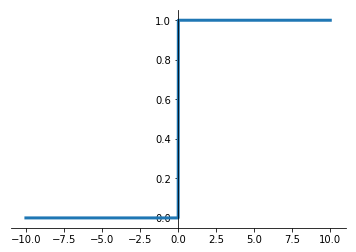

In [15]:
x = np.arange(-10,10,0.01)
y = np_step(x)

centerAxis()
plt.plot(x, y, lw=3)

#### Sigmoid activation

In [16]:
def np_sigmoid(X):
    return 1 / (1 + np.exp(X * -1))

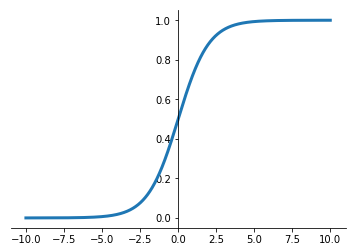

In [17]:
x = np.arange(-10,10,0.01)
y = np_sigmoid(x)

centerAxis()
plt.plot(x,y,lw=3)

#### The tanh

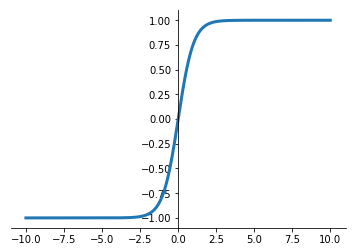

In [18]:
x = np.arange(-10,10,0.01)
y = np.tanh(x)

centerAxis()
plt.plot(x,y,lw=3)

#### Rectified linear unit

In [19]:
def np_relu(x):
    return np.maximum(0, x)

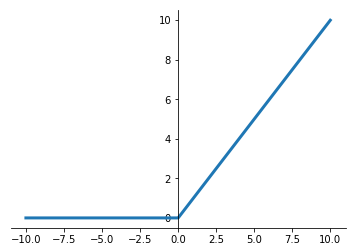

In [20]:
x = np.arange(-10,10,0.01)
y = np_relu(x)

centerAxis()
plt.plot(x,y,lw=3)

In [21]:
import math as math
def sigmoid(x):
    return 1 / (1 + math.exp(x * -1))

w0 = 3
w1 = -4
w2 = 2

def neuron(x1, x2):
    sum = w0 + x1 * w1 + x2 * w2
    return sigmoid(sum)

In [22]:
neuron(5.1, 3.5)

3.043155690056538e-05

In [23]:
# Version that takes as many values as you like
weights_with_bias = np.array([3, -4, 2])
def np_neuron(X):
    inputs_with_1_for_bias = np.concatenate((np.array([1]), X))
    return np_sigmoid(np.sum(inputs_with_1_for_bias*weights_with_bias));

In [24]:
np_neuron(np.array([5.1, 3.5]))

3.043155690056538e-05

## Keras

In [25]:
from keras.layers import Input
inputs = Input(shape=(4, ))

In [26]:
from keras.layers import Dense
fc = Dense(3)(inputs)

In [27]:
from keras.models import Model
model = Model(input=inputs, output=fc)

In [28]:
model.summary() # 15 parameters: 3 neurons, 4 (weighted) inputs + bias = 3 * (4 + 1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [29]:
# None means this dimension is variable.
# The first dimension in a keras model is always the batch size.

In [30]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

array([[-0.8073582,  5.6155715, -3.8409033]], dtype=float32)

In [32]:
# We want probabilities, use softmax.

inputs = Input(shape=(4, ))
fc = Dense(3)(inputs)
predictions = Dense(3, activation='softmax')(fc)
model = Model(input=inputs, output=predictions)

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 12        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

array([[0.06268468, 0.03696063, 0.9003547 ]], dtype=float32)

### Excursion: Cross Entropy

In [36]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

In [37]:
def cross_entropy(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred))

In [38]:
a = np.array([-5.83, 0.20, -0.65])

In [39]:
y_pred = softmax(a)

In [40]:
y_true = [0, 1, 0]

In [41]:
cross_entropy([0, 1, 0], y_pred)

0.3575488601118723

In [42]:
cross_entropy([0, 0, 1], y_pred)

1.2075488601118722

In [43]:
cross_entropy([1, 0, 0], y_pred)

6.387548860111872

# Training

In [44]:
X = np.array(iris.data)
y = np.array(iris.target)
X.shape, y.shape

((150, 4), (150,))

In [45]:
y[100]

2

In [46]:
from keras.utils.np_utils import to_categorical

num_categories = 3

y = to_categorical(y, num_categories)

In [47]:
y[100]

array([0., 0., 1.], dtype=float32)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

> validation_split: Float between 0 and 1. Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. 

In [50]:
# %time model.fit(X_train, y_train, epochs=500, validation_split=0.3, callbacks=[tb_callback])
# %time model.fit(X_train, y_train, epochs=500)
%time model.fit(X_train, y_train, epochs=500, validation_split=0.3)

Train on 84 samples, validate on 36 samples
Epoch 1/500
84/84 [==============================] - 0s 4ms/step - loss: 2.8480 - acc: 0.3333 - val_loss: 2.9528 - val_acc: 0.3333
Epoch 2/500
84/84 [==============================] - 0s 166us/step - loss: 2.7471 - acc: 0.3333 - val_loss: 2.8450 - val_acc: 0.3333
Epoch 3/500
84/84 [==============================] - 0s 240us/step - loss: 2.6456 - acc: 0.3333 - val_loss: 2.7391 - val_acc: 0.3333
Epoch 4/500
84/84 [==============================] - 0s 151us/step - loss: 2.5450 - acc: 0.3333 - val_loss: 2.6352 - val_acc: 0.3333
Epoch 5/500
84/84 [==============================] - 0s 226us/step - loss: 2.4469 - acc: 0.3333 - val_loss: 2.5322 - val_acc: 0.3333
Epoch 6/500
84/84 [==============================] - 0s 151us/step - loss: 2.3508 - acc: 0.3333 - val_loss: 2.4306 - val_acc: 0.3333
Epoch 7/500
84/84 [==============================] - 0s 214us/step - loss: 2.2560 - acc: 0.3333 - val_loss: 2.3312 - val_acc: 0.3333
Epoch 8/500
84/84 [========

Epoch 62/500
84/84 [==============================] - 0s 149us/step - loss: 0.7255 - acc: 0.7381 - val_loss: 0.7416 - val_acc: 0.7500
Epoch 63/500
84/84 [==============================] - 0s 177us/step - loss: 0.7226 - acc: 0.7381 - val_loss: 0.7389 - val_acc: 0.7500
Epoch 64/500
84/84 [==============================] - 0s 151us/step - loss: 0.7194 - acc: 0.7500 - val_loss: 0.7361 - val_acc: 0.7500
Epoch 65/500
84/84 [==============================] - 0s 146us/step - loss: 0.7163 - acc: 0.7500 - val_loss: 0.7332 - val_acc: 0.7500
Epoch 66/500
84/84 [==============================] - 0s 148us/step - loss: 0.7133 - acc: 0.7500 - val_loss: 0.7304 - val_acc: 0.7778
Epoch 67/500
84/84 [==============================] - 0s 142us/step - loss: 0.7103 - acc: 0.7500 - val_loss: 0.7276 - val_acc: 0.7778
Epoch 68/500
84/84 [==============================] - 0s 175us/step - loss: 0.7075 - acc: 0.7500 - val_loss: 0.7248 - val_acc: 0.7778
Epoch 69/500
84/84 [==============================] - 0s 159us

Epoch 123/500
84/84 [==============================] - 0s 115us/step - loss: 0.5733 - acc: 0.8214 - val_loss: 0.6000 - val_acc: 0.8333
Epoch 124/500
84/84 [==============================] - 0s 151us/step - loss: 0.5713 - acc: 0.8214 - val_loss: 0.5982 - val_acc: 0.8333
Epoch 125/500
84/84 [==============================] - 0s 152us/step - loss: 0.5694 - acc: 0.8214 - val_loss: 0.5963 - val_acc: 0.8333
Epoch 126/500
84/84 [==============================] - 0s 157us/step - loss: 0.5675 - acc: 0.8214 - val_loss: 0.5943 - val_acc: 0.8611
Epoch 127/500
84/84 [==============================] - 0s 147us/step - loss: 0.5657 - acc: 0.8214 - val_loss: 0.5924 - val_acc: 0.8611
Epoch 128/500
84/84 [==============================] - 0s 163us/step - loss: 0.5638 - acc: 0.8214 - val_loss: 0.5904 - val_acc: 0.8611
Epoch 129/500
84/84 [==============================] - 0s 157us/step - loss: 0.5619 - acc: 0.8095 - val_loss: 0.5884 - val_acc: 0.8889
Epoch 130/500
84/84 [==============================] - 

Epoch 184/500
84/84 [==============================] - 0s 164us/step - loss: 0.4816 - acc: 0.8452 - val_loss: 0.5088 - val_acc: 0.8889
Epoch 185/500
84/84 [==============================] - 0s 179us/step - loss: 0.4805 - acc: 0.8452 - val_loss: 0.5076 - val_acc: 0.8889
Epoch 186/500
84/84 [==============================] - 0s 168us/step - loss: 0.4792 - acc: 0.8571 - val_loss: 0.5062 - val_acc: 0.8889
Epoch 187/500
84/84 [==============================] - 0s 151us/step - loss: 0.4781 - acc: 0.8571 - val_loss: 0.5048 - val_acc: 0.9167
Epoch 188/500
84/84 [==============================] - 0s 148us/step - loss: 0.4769 - acc: 0.8571 - val_loss: 0.5034 - val_acc: 0.9444
Epoch 189/500
84/84 [==============================] - 0s 173us/step - loss: 0.4762 - acc: 0.8571 - val_loss: 0.5020 - val_acc: 0.9444
Epoch 190/500
84/84 [==============================] - 0s 144us/step - loss: 0.4746 - acc: 0.8690 - val_loss: 0.5008 - val_acc: 0.9444
Epoch 191/500
84/84 [==============================] - 

Epoch 245/500
84/84 [==============================] - 0s 155us/step - loss: 0.4225 - acc: 0.8810 - val_loss: 0.4444 - val_acc: 0.9444
Epoch 246/500
84/84 [==============================] - 0s 161us/step - loss: 0.4216 - acc: 0.8810 - val_loss: 0.4436 - val_acc: 0.9444
Epoch 247/500
84/84 [==============================] - 0s 154us/step - loss: 0.4209 - acc: 0.8810 - val_loss: 0.4428 - val_acc: 0.9444
Epoch 248/500
84/84 [==============================] - 0s 163us/step - loss: 0.4200 - acc: 0.8810 - val_loss: 0.4419 - val_acc: 0.9444
Epoch 249/500
84/84 [==============================] - 0s 139us/step - loss: 0.4193 - acc: 0.8810 - val_loss: 0.4409 - val_acc: 0.9444
Epoch 250/500
84/84 [==============================] - 0s 128us/step - loss: 0.4184 - acc: 0.8810 - val_loss: 0.4400 - val_acc: 0.9444
Epoch 251/500
84/84 [==============================] - 0s 147us/step - loss: 0.4176 - acc: 0.8810 - val_loss: 0.4391 - val_acc: 0.9444
Epoch 252/500
84/84 [==============================] - 

Epoch 306/500
84/84 [==============================] - 0s 114us/step - loss: 0.3788 - acc: 0.9405 - val_loss: 0.3938 - val_acc: 0.9722
Epoch 307/500
84/84 [==============================] - 0s 155us/step - loss: 0.3782 - acc: 0.9405 - val_loss: 0.3931 - val_acc: 0.9722
Epoch 308/500
84/84 [==============================] - 0s 162us/step - loss: 0.3774 - acc: 0.9405 - val_loss: 0.3923 - val_acc: 0.9722
Epoch 309/500
84/84 [==============================] - 0s 140us/step - loss: 0.3767 - acc: 0.9405 - val_loss: 0.3916 - val_acc: 0.9722
Epoch 310/500
84/84 [==============================] - 0s 142us/step - loss: 0.3764 - acc: 0.9405 - val_loss: 0.3908 - val_acc: 0.9722
Epoch 311/500
84/84 [==============================] - 0s 134us/step - loss: 0.3754 - acc: 0.9405 - val_loss: 0.3901 - val_acc: 0.9722
Epoch 312/500
84/84 [==============================] - 0s 132us/step - loss: 0.3749 - acc: 0.9405 - val_loss: 0.3894 - val_acc: 0.9722
Epoch 313/500
84/84 [==============================] - 

Epoch 367/500
84/84 [==============================] - 0s 153us/step - loss: 0.3425 - acc: 0.9405 - val_loss: 0.3500 - val_acc: 0.9722
Epoch 368/500
84/84 [==============================] - 0s 148us/step - loss: 0.3416 - acc: 0.9405 - val_loss: 0.3493 - val_acc: 0.9722
Epoch 369/500
84/84 [==============================] - 0s 137us/step - loss: 0.3410 - acc: 0.9405 - val_loss: 0.3486 - val_acc: 0.9722
Epoch 370/500
84/84 [==============================] - 0s 148us/step - loss: 0.3405 - acc: 0.9405 - val_loss: 0.3479 - val_acc: 0.9722
Epoch 371/500
84/84 [==============================] - 0s 165us/step - loss: 0.3399 - acc: 0.9405 - val_loss: 0.3472 - val_acc: 0.9722
Epoch 372/500
84/84 [==============================] - 0s 145us/step - loss: 0.3392 - acc: 0.9405 - val_loss: 0.3465 - val_acc: 0.9722
Epoch 373/500
84/84 [==============================] - 0s 151us/step - loss: 0.3390 - acc: 0.9405 - val_loss: 0.3458 - val_acc: 0.9722
Epoch 374/500
84/84 [==============================] - 

Epoch 488/500
84/84 [==============================] - 0s 144us/step - loss: 0.2814 - acc: 0.9405 - val_loss: 0.2745 - val_acc: 0.9722
Epoch 489/500
84/84 [==============================] - 0s 189us/step - loss: 0.2807 - acc: 0.9405 - val_loss: 0.2739 - val_acc: 0.9722
Epoch 490/500
84/84 [==============================] - 0s 136us/step - loss: 0.2801 - acc: 0.9405 - val_loss: 0.2732 - val_acc: 0.9722
Epoch 491/500
84/84 [==============================] - 0s 160us/step - loss: 0.2799 - acc: 0.9405 - val_loss: 0.2725 - val_acc: 0.9722
Epoch 492/500
84/84 [==============================] - 0s 143us/step - loss: 0.2792 - acc: 0.9405 - val_loss: 0.2720 - val_acc: 0.9722
Epoch 493/500
84/84 [==============================] - 0s 142us/step - loss: 0.2788 - acc: 0.9405 - val_loss: 0.2714 - val_acc: 0.9722
Epoch 494/500
84/84 [==============================] - 0s 136us/step - loss: 0.2786 - acc: 0.9405 - val_loss: 0.2708 - val_acc: 0.9722
Epoch 495/500
84/84 [==============================] - 

# Evaluation

In [51]:
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

array([[9.7120059e-01, 2.8510565e-02, 2.8881291e-04]], dtype=float32)

In [52]:
X[0], y[0]

(array([5.1, 3.5, 1.4, 0.2]), array([1., 0., 0.], dtype=float32))

In [53]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
train_loss, train_accuracy

120/120 [==============================] - 0s 76us/step


(0.27296675244967145, 0.949999996026357)

In [54]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
test_loss, test_accuracy

30/30 [==============================] - 0s 46us/step


(0.26241976022720337, 0.9666666388511658)